# Generalized Poisson branching process

In [8]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
## SVG graphics
%config InlineBackend.figure_format = 'svg' 


In [6]:
# plotting requirements
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from importlib import reload
mpl.rcParams['figure.figsize'] = (10, 10)

## Problem: binned Hawkes process regression

We have binned data summarising a continuous time Hawkes process realisation.

Thus it "looks" like a Galton-Watson (i.e. discrete time) branching process. And since the offspring distribution for a Hawkes process event follows a Poisson law, we might hope that binning it creates a Galton-Watson process with Poisson offspring distribution.

Then we could use the well-studied methods of Galton-Watson-process regression to recover the parameters of the underlying Hawkes process

However, a continuous-time Hawkes process does not in general map directly on to a Galton Watson process, since

* the conditional bin distributions are *not* Poisson if the branching ratio is non-zero, and 
* the influence kernels are not a single time-step

A regression based on this model would be useless since

* non-Poisson conditional counts
* ignoring the influence kernel

will both lead to the problem of *over-dispersion* invalidating the regression.

## Solution: generalised Galton Watson process

However, a simple solution which minimises our need to invent additional statistical tools is to note that only mild generalizations of the Galton Watson process are needed to produce a tractable model with known estimators for its parameters.

First, we notice that the linear decomposability of the Hawkes process suggests we may break it into superimposed processes. (Need to make rigorous)
Specifically, we can try to account for the the short- and long-timescale components separately.

We will assume that each endogenous event triggers child events at *two distinct scales*.

1. Within each bin, the *entire* fast, short-time-scale cluster runs to extinction. Exogenous rate is locally constant.
2. Between bins we also allow the "exogenous" rate to vary, using a discretised version of the continuous time triggering kernel.

So at a short time scale, we expect, conditional upon the branching ratio and background rate, that each bin will have a non-Poisson distribution of events.

<img  src="generalised_poisson_inar.png" width=400 />

At a longer time scale, we allow the history of the process to modulate the *background rate* in each bin.

<img  src="generalised_poisson_inar_slow.png" width=400/>

This is clearly not precisely the same construction as a continuous time Hawkes process.
However, it captures an important features of the continuous-time one: long-distance, heavy-tailed triggering.

## Construction

We define an integer-valued process indexed by the integers,
$$(Y(t))_{t\in \mathbb{Z}}.$$

We associate it with a non-decreasing count process,
$$N(t)_{t\in \mathbb{Z}}:=\sum_{i\leq t} Y(i).$$

Unlike the continuous-time process, increments are not almost surely 1.

TODO: show that the process we will define here can approach a Hawkes process in the limit with appropriately chosen parameters.


### Conditional bin distribution
We use Consul and Shoukri's Generalized Poisson model, which they show in a 1987 paper gives the total size of a subcritical Galton-Watson process with Poisson-distributed offspring - in Hawkes process terminology, this is the "cluster size".

The Generalized Poisson RV is one of the family of Lagrangian probability distributions, with an interpretation as the distribution of the total number of nodes a subcritical Galton Watson Tree before extinction.

Consider the population within one arbitrary "bin", $X$. (Note that I presume that all the quantities apart from the branching ratio may themselves be stochastic processes - $X\equiv X_t, \,\mu\equiv \mu_t$, but I omit the subscripts for clarity.)

We imagine this population is distributed as the sum of $K\sim\text{Pois}(\mu)$ Galton-watson trees, each with offspring distribution $\text{Pois}(\eta),$ all offspring independent.

If the initial population is Poisson with mean $\mu>0$ and the offspring is also Poisson with mean $0<\eta<1$, we have
$$P(X=k)=\frac{\mu(\mu+ \eta k)^{k-1}}{k!e^{\mu+k\eta}}.$$

We write $$X\sim GPD(\mu, \eta)$$

The moments for this distribution have convenient closed forms; for example:

$$\text{E}(X) = \frac{\mu}{1-\eta}, \text{Var}(X)=\frac{\mu}{(1-\eta)^3}$$

In terms of branching process, $\mu$ is the exogenous level for a given bin, and $\eta$ the branching ratio.


It is useful to have expressions for the log pmf:
$$\log P(X=k)=\log\mu + (k-1) \log (\mu+ \eta k) - \log k! -\mu-k\eta.$$


### Influence kernel

Now we construct influence kernels $\phi(t)$ defined on the non-negative integers.

As with the continuous time process, we are free to use any eventually-decreasing probability distribution. The geometric distribution would be a natural analogue of the exponential kernel.



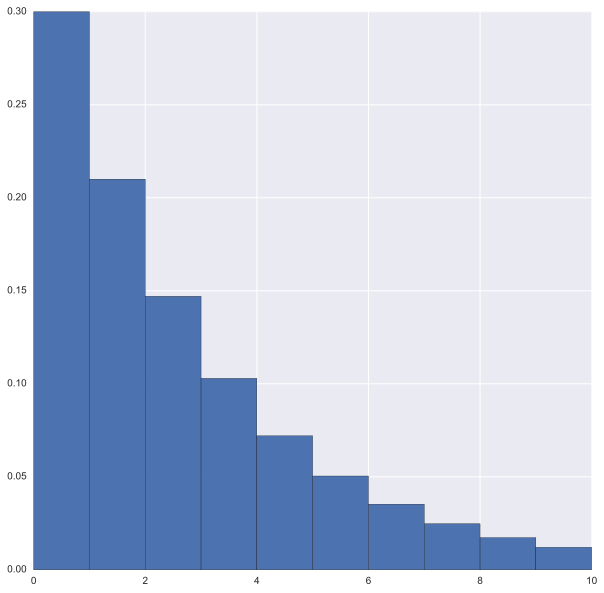

In [7]:
from scipy.stats import geom
x=np.arange(10)
plt.bar(x,geom.pmf(x+1,0.3), width=1);

A quantized version of the Omori law or any other probability distribution would be possible.


Reintroducing time indices, we imagine the increments to have an exogenous level given by the history of the process,

$$\lambda_t = \mu + \kappa\sum_{s\lt t}\phi_\theta(t-s)X(t),$$ for some constant background rate $\mu$ and some influence kernel $\phi$ and some constant $0\leq \kappa <1.$

Now we have broken the "total" branching ratio of the entire process into two components:

1. A "within bin" fast branching, characterised by $\eta$, and,
2. a "between bin" slow branching, $\kappa$

The PMF must place no mass at 0, by the usual causality argument.
The equality $s<t$ is strict since by assumption, all branching "within" a bin is quantified by the parameters of the Generalized Poisson Distribution.

Now, over a long interval under the assumption that a stationary distribution exists,
our unconditional total expected rate per bin generated by the stationary process is given
(TODO: fix. solution happens to be correct, but steps are wrong, since dependence not accounted for) 

$$E(\lambda_t)=\kappa E(X_{t-1}),$$ and thus,
$$E(X_t)=\frac{\lambda_t}{(1-\eta)},$$

Taking expectations, using stationarity and solving,
$$E\left(\frac{X_t}{X_{t-1}}\right)=\frac{\kappa}{(1-\eta)},$$

and we can find the analogy of "total" branching ratio of the Hawkes process from these:
$$\eta':=\frac{\kappa}{(1-\eta)}.$$

TODO: clarify, consider other properties and their preservation.

## Extension: unequal bin sizes

The discrete bin size does not solve the problems with the Youtube data by itself, since the bin sizes for that data set are uneven. However, with the interpretation of that model we can extend this to unequal bin sizes (TODO: make precise, prove) 

## Influence kernel Bases

### Poisson Basis

$$\phi_\text{R}(t)=\frac{e^{-\tau}\tau^t}{t!}$$

giving

modes $t=\tau$ and

location at $t=\tau$, and

scale $\tau$.

We get approximate resolvability if we take $\tau=\{1,2,4,9,16,\dots\}$